# Programming 1: Data, linear regression, linear classification

For this first programming session, we will get comfortable with the most popular libraries in python.

## 1. Warming up/getting data 

__Exerice 1.1__ Generate a random vector of size $n\times 2$ representing a list of 2D coordinates in the range $[0,1]\times [0,1]$ then plot the points using numpy and pyplot

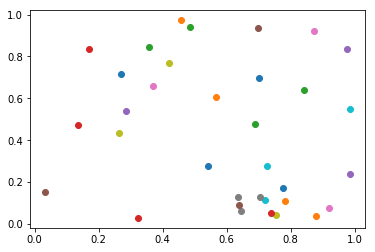

In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt

a = random.randint(1,40)

listPoints = np.random.random_sample((a,2))

for point in listPoints:
    plt.plot(point[0],point[1],'o')




__Exerice 1.2__ Compute the pariwise distances between the points in __1.1__

__Exerice 1.3*__ (Getting Data 1) In this third exercise, we will use the "requests" library. This library can be used to read/access information from the internet. I.e when you type in "facebook" in a google browser, facebook sends html (i.e how to website should look) to the browser, which then displays the html or the page in a pretty way. In fact, given any webpage, you can reveal the html source code by right clicking on the page and then selecting "Inspect element" or "view source". The "requests" library is used to ask servers for information (e.g html code). 

__1.3.1__ Use the lines below to load the html from the NYTimes webpage 

In [2]:
import requests

r = requests.get('https://www.nytimes.com/')

# we will then use "BeautifulSoup" to parse () the html  

from bs4 import BeautifulSoup

soup = BeautifulSoup(r.text,'html.parser')


__1.3.2__ Find the html tags that are used to define headlines (hint: look at the "div class" tags). Then using the "findAll" function from BeautifulSoup, return all the html lines containing the right "div class" tag 

In [5]:
# complete the parentheses in order to find all the 

container = soup.findAll()

"div",{"class":"css-1j836f9 esl82me3"}

for story_heading in container:

    print(story_heading.text)




Breaking News, World News & Multimedia - The New York Times

    
  (function() {
    var xhr = new XMLHttpRequest();
    xhr.withCredentials = true;
    xhr.open('POST', 'https://samizdat-graphql.nytimes.com/graphql/v2', true);
    xhr.setRequestHeader('Content-Type', 'application/json');
    xhr.setRequestHeader('nyt-app-type', 'project-vi');
    xhr.setRequestHeader('nyt-app-version', '0.0.3');
    xhr.setRequestHeader('nyt-token',   'MIIBIjANBgkqhkiG9w0BAQEFAAOCAQ8AMIIBCgKCAQEAlYOpRoYg5X01qAqNyBDM32EI/E77nkFzd2rrVjhdi/VAZfBIrPayyYykIIN+d5GMImm3wg6CmTTkBo7ixmwd7Xv24QSDpjuX0gQ1eqxOEWZ0FHWZWkh4jfLcwqkgKmfHJuvOctEiE/Wic5Qrle323SMDKF8sAqClv8VKA8hyrXHbPDAlAaxq3EPOGjJqpHEdWNVg2S0pN62NSmSudT/ap/BqZf7FqsI2cUxv2mUKzmyy+rYwbhd8TRgj1kFprNOaldrluO4dXjubJIY4qEyJY5Dc/F03sGED4AiGBPVYtPh8zscG64yJJ9Njs1ReyUCSX4jYmxoZOnO+6GfXE0s2xQIDAQAB');
    xhr.send('{"operationName":"UserQuery","variables":{},"query":"   query UserQuery {     user {       __typename       profile {         displayName       } 

__1.3.3*__ As you should see, there is one issue with the lines above. When the healine belongs to one of the articles at the bottom of the page, those lines sometimes include the author. add an additional pruning step that removes the author's name from the text returned by BeautifulSoup.

##__1.4__ (Getting Data II) Another way to get some data is to use the NYTimes API





## 2. Linear regression

There are multiple ways to do linear regression. One approach is to compute the solution by solving the linear system as we did during the exercise session. Another one is to use an iterative minimization method such as gradient descent. Finally one can also use existing implementations from e.g. scikit-learn. We will tackle each approach below

### 2.1 Simple regression

__Exercise 2.1.1__ (Generating data.) start by generating 2D pairs $(x,y)$ of points along a line. Then add a little noise to make the regression problem interesting. I.e your generative model should have the form $(y_i,x_i)$ where $y_i = \alpha x_i + \beta + \epsilon_i$ and $\epsilon_i$ are independent identically (Gaussian distributed) perturbations. Plot your data using pyplot and numpy

__Exercise 2.1.2__ Store the data into matrices $\boldsymbol X$ and vector $\boldsymbol y$ as we did in class and compute the solution of your 2D regression problem using the "inv" function from linalg. Once you have the coefficients, compare the noisy points with your predictions. (hint check the documentation for the "scatter" function) 

In [4]:
# Direct inversion
from numpy import array
from numpy.linalg import inv
from matplotlib import pyplot

a = random.randint(20,50)

listPoints = np.random.normal((a,2))

for point in listPoints:
    plt.scatter(point[0],point[1])



IndexError: invalid index to scalar variable.

__Exercise 2.1.3__ (Bad conditioning and bias/variance) To see what happens when the system is badly conditioned, we will consider a non linear dataset on which will apply a linear regression model based on various degree monomials. Start by generating $(x,y)$ pairs along a sine wave. Take $x$ to be defined as $x = k\pi/180$ for $k \in [60,300]$ every $4$ points. Then define your $y$ as $y = \sin(x) + \varepsilon(x)$ where $\varepsilon(x)$ are random i.i.d Gaussian perturbations with mean $0$ and std $0.15$ (hint: use the random.normal function from numpy)

__2.1.3.a__ plot your data using pyplot

__2.1.3.b__ Store your $x$ and $y$ into vectors. Then write a snippet that generates all powers of your points $x$ up to a degree $d$. 

__2.1.3.c__ To go faster, instead of deriving the regression model by solving the linear system, we will now use the "LinearRegression" implementation from scikit-learn. Check the documentation. Then use this function to derive regression models for monomials up to degree 1,3,6,9,12 and 15. Plot your models on top of the data from 2.1.1. using subplot

What can you see? Check the evolution in the value of the regression coefficient. What can you say?

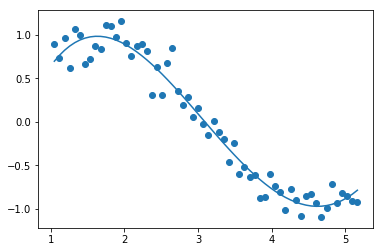

In [5]:
import numpy as np
import matplotlib.pyplot as plot
from sklearn.linear_model import LinearRegression

k = np.arange(60,300,4)
x = np.pi*k/180

d = 4

epsilon = np.random.normal(0,0.15,60)
y = np.sin(x) + epsilon

vector = np.zeros((d, np.size(x)))

for i in range (0,d):
    vector[i,:] = x**(i+1)

reg = LinearRegression().fit(vector.T,y) 
yy = reg.predict(vector.T)



plot.scatter(x,y)
plot.plot(x,yy)





This illustrates the notion of bias variance tradeoff. Highly complex models will tend to fit even small deviations and hence will lead to a large variance. Simpler models on the other will have a large bias but will vary a little when changing the sample.

__2.1.4__ (Regularization) One approach at avoiding this is to select the number of terms in the regression model. However, it is not always clear how to select those terms. Another approach which is more flexible is to add a regularization term (i.e a term that will force the coefficient of the regression model to remain relatively small). The regularized problem reads as 

$$\underset{\beta}{\operatorname{argmin}} \|\boldsymbol X\boldsymbol \beta - \boldsymbol y\|^2 + \alpha R(\boldsymbol \beta)$$ 

For some function $R(\boldsymbol \beta)$. Here we choose $R(\boldsymbol \beta) = \sqrt{\sum_{i=1}^N \beta_n^2}$ (the $\ell_2$ norm).
To see the effect of regularization, use the "Ridge" implementation from scikit-learn. Choose your dataset to be given by all powers of $x$ up to $16$. Then compute the ridge regression model using the function "Ridge" with different values for the multiplier $\alpha$ (take for example $\alpha = \left\{1e^{-14}, 1e^{-10}, 1e^{-4}, 1, 10\right\}$). plot the results

/Users/Kiara/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.469200e-19
  overwrite_a=True).T


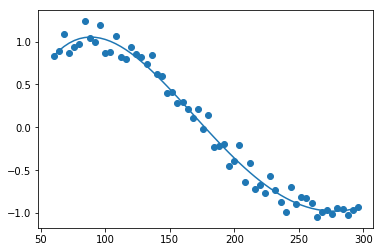

In [67]:
import numpy as np
import matplotlib.pyplot as plot
from sklearn.linear_model import Ridge

k = np.arange(60,300,4)
x = np.pi*k/180

d = 4

epsilon = np.random.normal(0,0.1,60)
y = np.sin(x)+ epsilon

vector = np.zeros((d, np.size(x)))

for i in range (0,d):
    vector[i,:] = k2**(i+1)

vector = vector.T

ridge = Ridge(alpha=1.0)
reg = ridge.fit(vector, y)
yy = reg.predict(vector)


plot.scatter(k,y)
plot.plot(k,yy)

plot.show()






### 2.2 Gradient descent 

__Exercise 2.2.1__ (Your first gradient descent algorithm). So far we have  either solved the regression problem directly using linalg, or using the implementation from scikit-learn. An alternative is to use a gradient descent on the function  

$$\underset{\beta}{\operatorname{argmin}}f(\boldsymbol \beta)\equiv \|\boldsymbol X\boldsymbol \beta - \boldsymbol y\|^2 + \alpha R(\boldsymbol \beta)$$ 


__2.2.1a__ write a function which computes the gradient of this objective for the points $(X,y)$, and takes as argument a vector of regession weights $\boldsymbol \beta$.

In [ ]:
# put your code here

__2.2.1b__ Given the function above, write a small code that starts from some (random) initialization of the vector of parameters $\boldsymbol \beta$ and update this vector with the gradient as

$$\beta_{k+1}\leftarrow \beta_k - \alpha_k\nabla f(\beta_k)$$

start by using a constant step size $\alpha_k$. Then use a better update rule (see for example https://en.wikipedia.org/wiki/Gradient_descent#Description). When do you stop?

### 2.3 Using regression as a predictive model

__Exercise 2.3.1__ Now that you have spent some time on simple regression problems, we will want to use those models on real data. Use the code below to download the evolution of the Google Stock between january 2017 and may 2017 through yahoo finance. Here our 'X' data encodes a moving average and y is the stock price.

In [ ]:
import pandas as pd
import numpy as np
pd.core.common.is_list_like = pd.api.types.is_list_like

from pandas_datareader import data as pdr

import matplotlib.pyplot as plt

import fix_yahoo_finance as yf
yf.pdr_override() # <== that's all it takes :-)

# download dataframe
data1 = pdr.get_data_yahoo("GOOGL", start="2017-01-01", end="2017-06-30")
close = data1['Close']
all_weekdays = pd.date_range(start="2017-01-01", end="2017-06-30", freq='B')

# How do we align the existing prices in adj_close with our new set of dates?
# All we need to do is reindex close using all_weekdays as the new index
close = close.reindex(all_weekdays)
close = close.fillna(method='ffill')
msft = close#.loc['SPY']

# Calculate the 20 and 100 days moving averages of the closing prices
short_rolling_msft = msft.rolling(window=20).mean()
long_rolling_msft = msft.rolling(window=100).mean()

msft = msft.dropna()
#msft_norm = (msft - msft.mean()) / (msft.max() - msft.min())
tmp = msft.index
numDays = tmp.shape[0]

days = np.arange(1,numDays+1)


# Applying the regression model

from sklearn.linear_model import LinearRegression

print(X_train.transpose)
print(y_train.values)

print(X_train.shape)
tmp = y_train.values
print(tmp.shape)

lr = LinearRegression().fit(X_train.reshape(-1,1),tmp.reshape(-1,1))

pred = lr.predict(X_test.reshape(-1,1))


# #training a linear prediction model


#fig, axes = plt.subplots(nrows=1, ncols=2)
fig, axes = plt.subplots(nrows=1, ncols=1)
#fig, ax = plt.subplots(figsize=(8,5))
plt.plot(days, msft, label='GOOGL')
#axes[0,0].plot(X_train.reshape(-1,1), tmp.reshape(-1,1), label='training')
plt.xlabel('Date')
plt.ylabel('Adjusted closing price ($)')
plt.legend()
plt.title('Google stock value')

fig.tight_layout() 

plt.show()


__Exercise 2.3.2__ Learn a regression a model that takes as input the current msft from the previous ten msft. (you can use scikit-learn)

__Exercise 2.3.3__ Same question with a different prediction horizon (lets say 5 days) still using the previous 5 days. Add all monomials of up to degree $4$ (inclduing cross terms)

__Exercise 2.3.4__ For both __2.3.2__ and __2.3.3__, evaluate the quality of your prediction by splitting the time series into a subseries that you use for training and another one that you use to test the model.

### 2.4 Finding correlation in data

__Exercise 2.4.1__ Using the snippet below, download the evolution of the NIKKEI 225 and the S&P 500 between November 2012 and November 2013. Plot the graph $(X_1,X_2)$ for $X_1$ = NIKKEI and $X_2$ = S&P. What can you see ? 

Learn a regression model of the form $X_2 = \beta_0 + \beta_1 X_1$


In [ ]:
# put your code here



## 3. Linear Classification

__3.1__ There are several possibilities to define a classifier. One is to use the regression model to define a separating plane. Scikit-learn has an interesting built in function, "make_blobs" that generates datasets. Starting with the two classes dataset below, compute a separating plane using $0/1$ labels for the two classes. Before computing the plane, do not forget to split your dataset between a training and a test set. Learn the plane from the training set and then benchmark your model on the points from the test set.

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=200, centers=2, n_features=2,cluster_std=0.7, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y,
                alpha=0.5, edgecolor='k')
plt.show()


# put your code here



__3.2__ When there are multiple classes, the problem becomes a little more tricky. There are however several possibilities to extend the two classes classifier. One is to view the set of clusters as a set of 1 clusters versus all the others (1 vs rest). The other is to try to find a set of pairwise boundaries (1 vs 1). In the first case. The class of a new point is then determined based on the comparison of the outputs from the different separating planes

Implement both methods on  the $4$ classes data set below. Again first split your dataset between a training and a test part (for example using the function train_test_split from scikit-learn).

In [ ]:
# put your code here




__3.3__ The issue with the one vs one or one vs rest classifiers is that they sometimes leave undefined areas in space. A better alternative is to introduced dummy variables. I.e we now consider a vector of labels $\boldsymbol y$, where the entry $k$ corresponds to a binary variable encoding whether a point $\boldsymbol x$ belongs to the $k^{th}$ class (1) or not. Obviously if there is a one somewhere all the other entries are $0$. For such a model, we can learn $K$ regression planes simultaneously by solving the system
$$\hat{\boldsymbol Y} = \boldsymbol X\boldsymbol B$$

The rows of $\boldsymbol Y$ are $N$ $0/1$ vectors with a single $1$, the rows of $\boldsymbol X$ encode the $N$ $p$-dimensional prototypes + the column of $1$ for the intercept.  The regression model from above then becomes

$$\min_{\boldsymbol B} \sum_{i=1}^N \|\boldsymbol y_i - [1,\boldsymbol x_i]\boldsymbol B\|^2$$

$y_i$ is the binary vector. Write this system in matrix equation and solve it with linalg as above and solve the multi class classification problem on the dataset below.

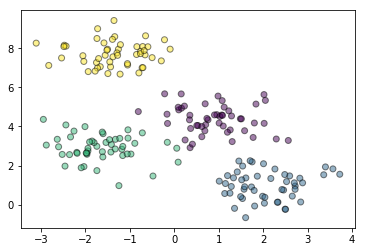

In [52]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=200, centers=4, n_features=2,cluster_std=0.7, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y,
                alpha=0.5, edgecolor='k')
plt.show()


In [ ]:


# put your code here
